In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_AL_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1.0,0.0,0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,0
1,1,1,2,0,0.0,0.0,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,7
2,2,2,1,0,NaN,NaN,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,7
3,2,2,2,1,0.0,0.0,2,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2,NaN,7
4,2,2,1,0,0.0,0.0,2,0.0,2.0,0.0,...,0.0,0.0,0.0,3.0,0.0,2.0,2.0,2,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3,0.0,70
354,2,3,2,0,0.0,0.0,0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,70
355,2,2,2,1,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2,0.0,70
356,2,1,0,3,0.0,0.0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,70


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
int64		column 3	0
int64		column 4	0
float64		column 5	17
float64		column 6	17
int64		column 7	0
float64		column 8	69
float64		column 9	69
float64		column 10	69
int64		column 11	0
float64		column 12	52
int64		column 13	0
float64		column 14	17
int64		column 15	0
float64		column 16	69
int64		column 17	0
int64		column 18	0
float64		column 19	35
int64		column 20	0
float64		column 21	69
float64		column 22	69
float64		column 23	34
float64		column 24	69
float64		column 25	69
float64		column 26	52
float64		column 27	69
float64		column 28	52
float64		column 29	69
float64		column 30	69
float64		column 31	69
int64		column 32	0
float64		column 33	69
int64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,358.000000,358.000000,358.000000,358.000000,341.000000,341.000000,358.000000,289.000000,289.000000,289.000000,...,289.000000,306.000000,289.000000,306.000000,289.000000,289.000000,289.000000,358.000000,289.000000,358.000000
mean,2.078212,1.807263,1.569832,1.354749,0.639296,0.431085,0.170391,0.391003,0.667820,0.595156,...,0.422145,0.506536,0.474048,0.950980,0.474048,0.083045,0.089965,1.877095,0.577855,36.296089
std,0.664865,0.701541,0.900909,1.135062,0.908511,0.941886,0.576394,0.843308,1.017402,0.956762,...,0.886821,0.898974,0.971924,1.148434,0.975490,0.408278,0.423531,0.699324,1.128080,15.324557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.750000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

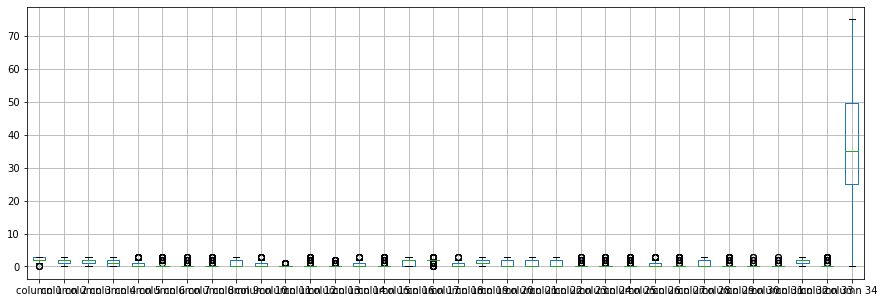

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.078212
column 2      1.807263
column 3      1.569832
column 4      1.354749
column 5      0.639296
column 6      0.431085
column 7      0.170391
column 8      0.391003
column 9      0.667820
column 10     0.595156
column 11     0.122905
column 12     0.437908
column 13     0.142458
column 14     0.551320
column 15     0.315642
column 16     1.342561
column 17     1.955307
column 18     0.511173
column 19     1.337461
column 20     0.662011
column 21     1.010381
column 22     0.709343
column 23     0.305556
column 24     0.397924
column 25     0.422145
column 26     0.506536
column 27     0.474048
column 28     0.950980
column 29     0.474048
column 30     0.083045
column 31     0.089965
column 32     1.877095
column 33     0.577855
column 34    36.296089
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.428769,0.248062,-0.033157,-0.003010,0.036388,-0.115275,-0.057070,0.146048,0.180734,...,-0.041243,0.132549,-0.017821,0.026651,-0.023013,0.000087,0.010182,0.093026,-0.022134,-0.005028
column 2,0.428769,1.000000,0.347106,-0.072191,-0.006461,-0.078940,-0.098665,-0.125052,0.299975,0.295922,...,-0.116577,0.189379,-0.131172,0.006531,-0.151885,-0.041305,-0.048220,-0.008453,-0.169498,0.016006
column 3,0.248062,0.347106,1.000000,-0.058534,0.229986,0.308239,-0.176715,0.238298,0.312792,0.275840,...,0.254753,0.348390,0.255071,-0.278994,0.230011,-0.096381,-0.150822,0.124812,0.237884,0.138493
column 4,-0.033157,-0.072191,-0.058534,1.000000,0.281751,0.412413,-0.144027,0.350481,-0.287874,-0.142490,...,0.370131,-0.204570,0.377094,0.021476,0.381941,-0.146046,-0.153116,0.051553,0.392738,0.048053
column 5,-0.003010,-0.006461,0.229986,0.281751,1.000000,0.381599,-0.172132,0.337638,-0.034443,0.022759,...,0.372582,-0.023173,0.324454,-0.006853,0.342746,-0.129792,-0.154985,0.100155,0.326936,0.070614
column 6,0.036388,-0.078940,0.308239,0.412413,0.381599,1.000000,-0.134499,0.859303,-0.292033,-0.285554,...,0.885337,-0.143821,0.904142,0.103154,0.882449,-0.079477,-0.101352,0.251876,0.903628,0.065874
column 7,-0.115275,-0.098665,-0.176715,-0.144027,-0.172132,-0.134499,1.000000,-0.123374,0.165340,-0.005606,...,-0.104161,-0.156212,-0.129784,-0.013876,-0.129309,0.744257,0.823052,-0.093833,-0.118613,-0.371368
column 8,-0.057070,-0.125052,0.238298,0.350481,0.337638,0.859303,-0.123374,1.000000,-0.305398,-0.289419,...,0.892809,-0.167529,0.891460,0.133282,0.875538,-0.064382,-0.098830,0.301434,0.889490,0.057605
column 9,0.146048,0.299975,0.312792,-0.287874,-0.034443,-0.292033,0.165340,-0.305398,1.000000,0.685358,...,-0.286605,0.515277,-0.300196,-0.460994,-0.299098,0.158591,0.190466,-0.102890,-0.292025,-0.014640
column 10,0.180734,0.295922,0.275840,-0.142490,0.022759,-0.285554,-0.005606,-0.289419,0.685358,1.000000,...,-0.293046,0.513878,-0.285785,-0.466133,-0.292181,-0.091411,-0.055475,0.045097,-0.287579,0.060499


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+23,34+23+23,34+23+23+23,34+23+23+23+23,34+23+23+23+23+23,34+23+23+23+23+23+23,34+23+23+23+23+23+23+23,34+23+23+23+23+23+23,34+23+23+23+23+23,34+23+23+23+23,34+23+23+23,34+23+23,34+23,34], vae_layer = False, seed = 23)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 73.31825429742986
Epoch: 1 , loss: 73.48374834927645
Epoch: 2 , loss: 73.19922083074397
Epoch: 3 , loss: 73.0444433038885
Epoch: 4 , loss: 73.23705118352717
Epoch: 5 , loss: 73.12614232843572
Epoch: 6 , loss: 72.64596072110263
Epoch: 7 , loss: 70.8226467479359
Epoch: 8 , loss: 68.27937351573597
Epoch: 9 , loss: 66.66277001120828
Epoch: 10 , loss: 65.91477168690075
Epoch: 11 , loss: 65.46534850380637
Epoch: 12 , loss: 64.98897881941362
Epoch: 13 , loss: 64.30105764215642
Epoch: 14 , loss: 64.39846316250888
Epoch: 15 , loss: 63.9509993466464
Epoch: 16 , loss: 64.03298325972123
Epoch: 17 , loss: 63.36256980895996
Epoch: 18 , loss: 63.20022236217152
Epoch: 19 , loss: 63.067651922052555
Epoch: 20 , loss: 63.042527112093836
Epoch: 21 , loss: 63.01458930969238
Epoch: 22 , loss: 62.57103070345792
Epoch: 23 , loss: 62.08438145030629
Epoch: 24 , loss: 61.95898992365057
Epoch: 25 , loss: 62.090697201815516
Epoch:

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.0
column 2      1.0
column 3      1.0
column 4      1.0
column 5      0.0
column 6      0.0
column 7      2.0
column 8      0.0
column 9      3.0
column 10     2.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     1.0
column 15     0.0
column 16     1.0
column 17     1.0
column 18     1.0
column 19     1.0
column 20     0.0
column 21     0.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     1.0
column 32     1.0
column 33     1.0
column 34    12.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0,0,0.000000,0.00000,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
1,0,0,0,0,0.000000,0.00000,0,0.087155,-2.730170,0.216106,...,0.095561,0.154505,0.115317,0.341354,0.110852,-1.995925,-2.003904,0,0.143619,0
2,0,0,0,0,0.632829,0.17365,0,0.158311,-1.145047,0.756721,...,0.165037,0.560169,0.178524,-0.998968,0.186054,-3.010502,-3.038199,0,0.330903,0
3,0,0,0,0,0.000000,0.00000,0,0.114742,-1.641791,-1.666807,...,0.122182,0.304391,0.144945,0.000000,0.151341,-1.991434,-2.005324,0,0.179981,0
4,0,0,0,0,0.000000,0.00000,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0,0,0,0,0.000000,0.00000,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
354,0,0,0,0,0.000000,0.00000,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
355,0,0,0,0,0.000000,0.00000,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
356,0,0,0,0,0.000000,0.00000,0,0.358581,0.895549,0.846968,...,0.461609,0.625282,0.493287,1.016255,0.427970,0.009088,-0.016082,0,0.642205,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(30.060360991049464, 758.0725558942231)

In [17]:
NRMS=numerator/denominator
NRMS


0.03965367266935318

In [18]:
new_df.iloc[66,:]

column 1      2.000000
column 2      0.000000
column 3      0.000000
column 4      3.000000
column 5      0.000000
column 6      0.000000
column 7      0.000000
column 8      0.109109
column 9      0.323263
column 10     0.329613
column 11     0.000000
column 12     0.137051
column 13     0.000000
column 14     0.000000
column 15     2.000000
column 16     0.660197
column 17     2.000000
column 18     0.000000
column 19     0.723000
column 20     0.000000
column 21     0.496330
column 22     0.387268
column 23     0.000000
column 24     0.228270
column 25     0.126066
column 26     0.298655
column 27     0.145176
column 28     0.476130
column 29     0.125519
column 30     0.008691
column 31    -0.007680
column 32     2.000000
column 33     0.166161
column 34    22.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1.000000,0.00000,0,0.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,2.000000,0
1,1,1,2,0,0.000000,0.00000,3,0.087155,0.269830,0.216106,...,0.095561,0.154505,0.115317,0.341354,0.110852,0.004075,-0.003904,2,0.143619,7
2,2,2,1,0,0.632829,0.17365,3,0.158311,0.854953,0.756721,...,0.165037,0.560169,0.178524,1.001032,0.186054,-0.010502,-0.038199,2,0.330903,7
3,2,2,2,1,0.000000,0.00000,2,0.114742,0.358209,0.333193,...,0.122182,0.304391,0.144945,2.000000,0.151341,0.008566,-0.005324,2,0.179981,7
4,2,2,1,0,0.000000,0.00000,2,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,2.000000,2,0.000000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1.000000,0.00000,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3,0.000000,70
354,2,3,2,0,0.000000,0.00000,0,0.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,70
355,2,2,2,1,0.000000,0.00000,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2,0.000000,70
356,2,1,0,3,0.000000,0.00000,0,0.358581,0.895549,0.846968,...,0.461609,0.625282,0.493287,1.016255,0.427970,0.009088,-0.016082,1,0.642205,70


In [20]:
imputations[-1].to_excel("DERM_AL_10(imp).xlsx", index=False, header=False)